In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


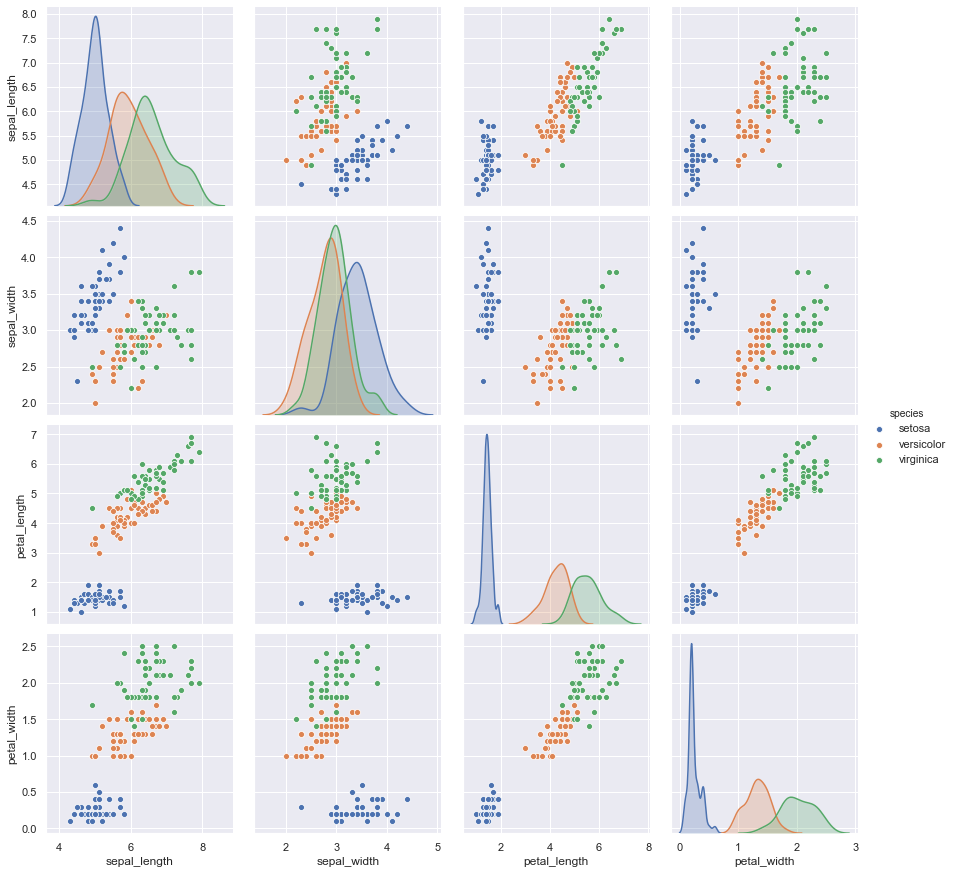

In [3]:
import seaborn as sns;
sns.set()
sns.pairplot(iris, hue='species', height=3);

* we will extract the features matrix and target array from the
DataFrame

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
    • For supervised learning, often we predict labels for unknown data using the `predict()` method.
    • For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

### Supervised learning example: Simple linear regression
As an example of this process, let’s consider a simple linear regression—that is, the common case of fitting a line to x, y data. We will use the following simple data for our regression example.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

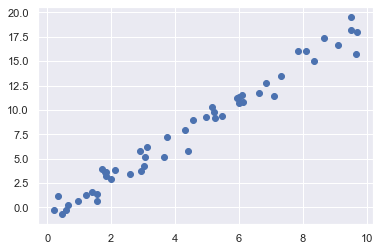

In [10]:
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model.

In [12]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters.

In [15]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Keep in mind that when the model is instantiated, the only action is the storing
of these hyperparameter values. In particular, we have not yet applied the
model to any data:

#### 3. Arrange data into a features matrix and target vector.

Scikit-Learn data representation, which requires a
two-dimensional features matrix and a one-dimensional target array. Here our
target variable y is already in the correct form `(a length-n_samples array)`, but we need to massage the data x to make it a matrix of size `[n_samples, n_features]`. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [24]:
X = x.reshape(-1, 1)
X.shape

(50, 1)

In [27]:
#Alternatively

X = x[:, np.newaxis]
X.shape

(50, 1)

In [28]:
y.shape

(50,)

#### 4. Fit the model to your data.
Now it is time to apply our model to data. This can be done with the `fit()`
method of the model:

In [29]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* This `fit()` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in modelspecific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the `fit()` process have trailing underscores; for example, in this linear model, we have the following:

In [31]:
model.coef_

array([1.9776566])

In [32]:
model.intercept_

-0.9033107255311164

* These two parameters represent the slope and intercept of the simple linear fit to
the data. Comparing to the data definition, we see that they are very close to the
input slope of 2 and intercept of –1.

#### 5. Predict labels for unknown data.

Once the model is trained, the main task of supervised machine learning is to
evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, we can do this using the `predict()` method. For the sake of this example, our “new data” will be a grid of x values, and we will ask what y values the model predicts:

In [35]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

* As before, we need to coerce these x values into a [n_samples, n_features]
features matrix, after which we can feed it to the model:

In [37]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

* Finally, let’s visualize the results by plotting first the raw data, and then this
model fit

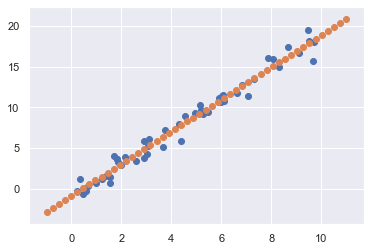

In [40]:
plt.scatter(x, y)
plt.scatter(xfit, yfit);

### Supervised learning example: Iris classification

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before you explore whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the `train_test_split` utility function:

In [45]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

- With the data arranged, we can follow our recipe to predict the labels:

In [47]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB() # 2. instantiate model

model.fit(Xtrain, ytrain) # 3. fit model to data

y_model = model.predict(Xtest) # 4. predict on new data

- Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value: 

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let’s take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lowerdimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data; after all, it is much easier to plot data in two dimensions than in four dimensions or higher! Here we will use principal component analysis, which is a fast linear dimensionality reduction technique.

We will ask the model to return two components—that is, a two-dimensional
representation of the data. Following the sequence of steps outlined earlier, we have: 

In [51]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

Now let’s plot the results. A quick way to do this is to insert the results into the original
Iris DataFrame, and use Seaborn’s lmplot to show the results:

In [60]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


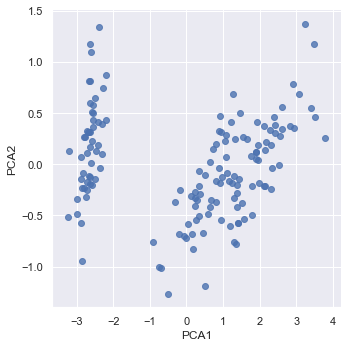

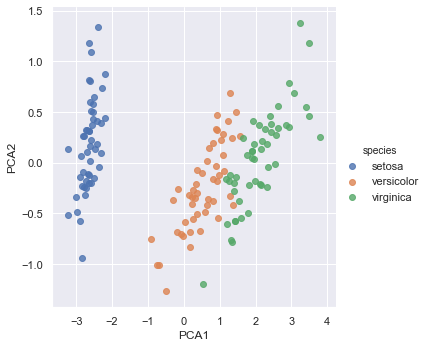

In [63]:
sns.lmplot("PCA1", "PCA2", data=iris, fit_reg=False);
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated,
even though the PCA algorithm had no knowledge of the species labels! This
indicates to us that a relatively straightforward classification will probably be effective
on the dataset, as we saw before.

### Unsupervised learning: Iris clustering

Let’s next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM). A GMM attempts to model the data as a collection of Gaussian blobs. We can fit the Gaussian mixture model as follows:

In [71]:
from sklearn.mixture import GaussianMixture  # 1. Choose the model class
model = GaussianMixture (n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

As before, we will add the cluster label to the Iris DataFrame and use Seaborn to plot
the results:

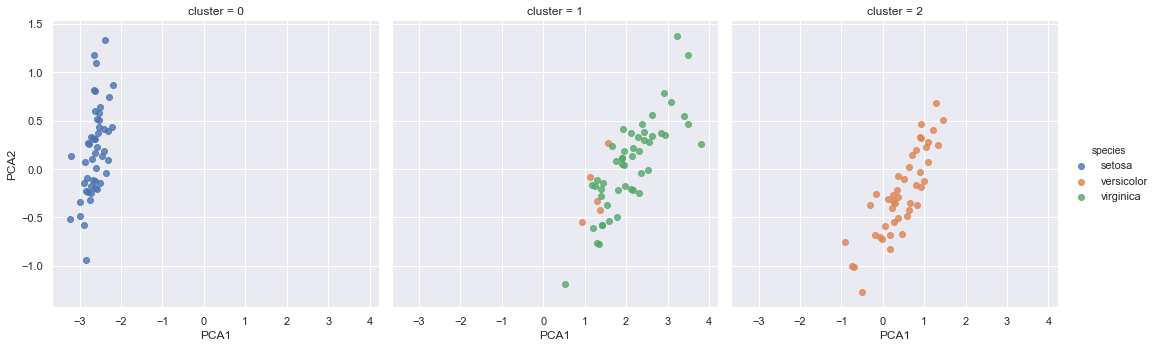

In [72]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm
has recovered the underlying label: the setosa species is separated perfectly within
cluster 0, while there remains a small amount of mixing between versicolor and virginica.
This means that even without an expert to tell us the species labels of the individual
flowers, the measurements of these flowers are distinct enough that we could
automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

### Validation curves

Let’s look at an example of using cross-validation to compute the validation curve for
a class of models. Here we will use a polynomial regression model: this is a generalized
linear model in which the degree of the polynomial is a tunable parameter. For
example, a degree-1 polynomial fits a straight line to the data; for model parameters a
and b:

$$y = ax + b$$

A degree-3 polynomial fits a cubic curve to the data; for model parameters a, b, c, d:

$$y = ax^3 + bx^2 + cx + d$$

We can generalize this to any number of polynomial features. In Scikit-Learn, we can
implement this with a simple linear regression combined with the polynomial preprocessor.
We will use a pipeline to string these operations together.

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

- Now let’s create some data to which we will fit our model:

In [161]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) 
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
X, y

(array([[4.17022005e-01],
        [7.20324493e-01],
        [1.14374817e-04],
        [3.02332573e-01],
        [1.46755891e-01],
        [9.23385948e-02],
        [1.86260211e-01],
        [3.45560727e-01],
        [3.96767474e-01],
        [5.38816734e-01],
        [4.19194514e-01],
        [6.85219500e-01],
        [2.04452250e-01],
        [8.78117436e-01],
        [2.73875932e-02],
        [6.70467510e-01],
        [4.17304802e-01],
        [5.58689828e-01],
        [1.40386939e-01],
        [1.98101489e-01],
        [8.00744569e-01],
        [9.68261576e-01],
        [3.13424178e-01],
        [6.92322616e-01],
        [8.76389152e-01],
        [8.94606664e-01],
        [8.50442114e-02],
        [3.90547832e-02],
        [1.69830420e-01],
        [8.78142503e-01],
        [9.83468338e-02],
        [4.21107625e-01],
        [9.57889530e-01],
        [5.33165285e-01],
        [6.91877114e-01],
        [3.15515631e-01],
        [6.86500928e-01],
        [8.34625672e-01],
        [1.8

* We can now visualize our data, along with polynomial fits of several degrees

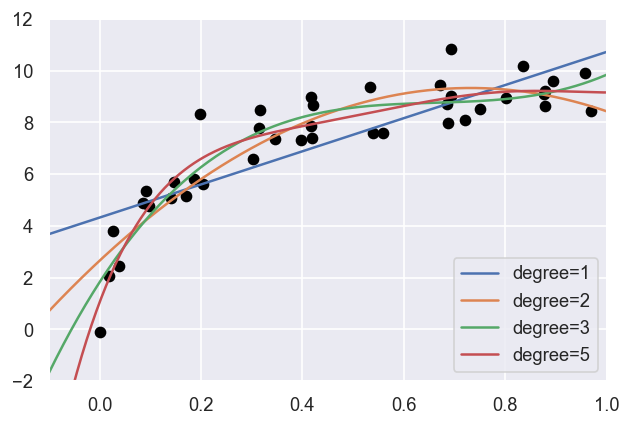

In [174]:
import matplotlib.pyplot as plt
import seaborn;

seaborn.set() # plot formatting
plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 120})

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1,2, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model complexity in this case is the degree of the polynomial,
which can be any non-negative integer. A useful question to answer is this: what
degree of polynomial provides a suitable trade-off between bias (underfitting) and
variance (overfitting)?

We can make progress in this by visualizing the validation curve for this particular
data and model; we can do this straightforwardly using the validation_curve convenience
routine provided by Scikit-Learn. Given a model, data, parameter name, and a
range to explore, this function will automatically compute both the training score and
validation score across the range

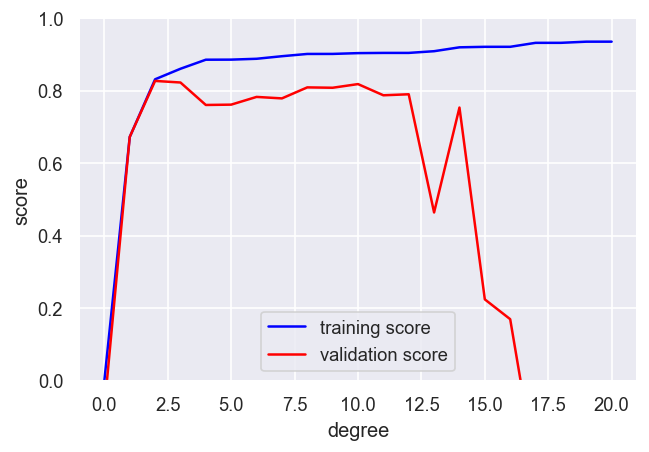

In [191]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

- From the validation curve, we can read off that the optimal trade-off between bias
and variance is found for a second-order polynomial; we can compute and display this
fit over the original data as follows

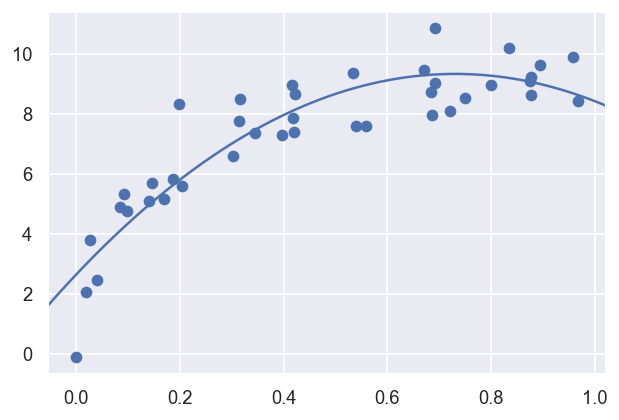

In [177]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(2).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves
One important aspect of model complexity is that the optimal model will generally
depend on the size of your training data. For example, let’s generate a new dataset
with a factor of five more points

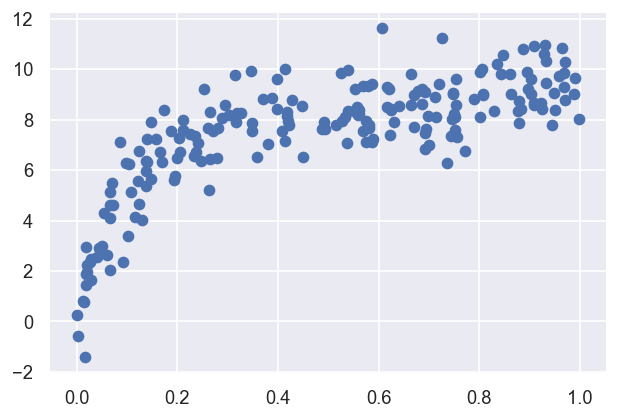

In [188]:
X2, y2 = make_data(200)
plt.scatter(X2, y2);

(0, 1)

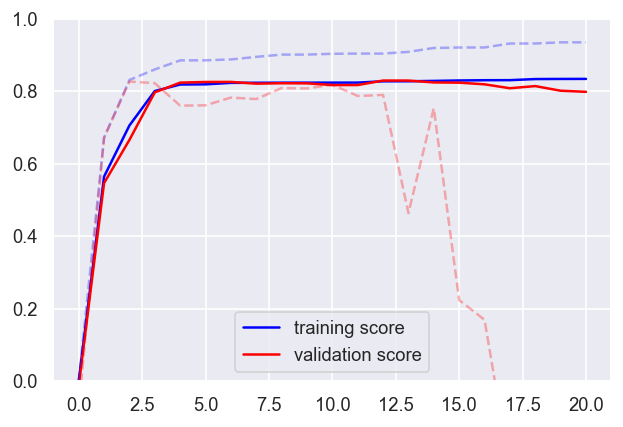

In [203]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                            'polynomialfeatures__degree',
                                            degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')

plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0, 1)

- The solid lines show the new results, while the fainter dashed lines show the results of
the previous smaller dataset. It is clear from the validation curve that the larger dataset
can support a much more complicated model: the peak here is probably around a
degree of 6, but even a degree-20 model is not seriously overfitting the data—the validation
and training scores remain very close.
- Thus we see that the behavior of the validation curve has not one, but two, important
inputs: the model complexity and the number of training points. It is often useful to
explore the behavior of the model as a function of the number of training points,
which we can do by using increasingly larger subsets of the data to fit our model. A
plot of the training/validation score with respect to the size of the training set is
known as a learning curve.

### Learning curves

- we will compute a learning curve for our original dataset with a secondorder
polynomial model and a ninth-order polynomial

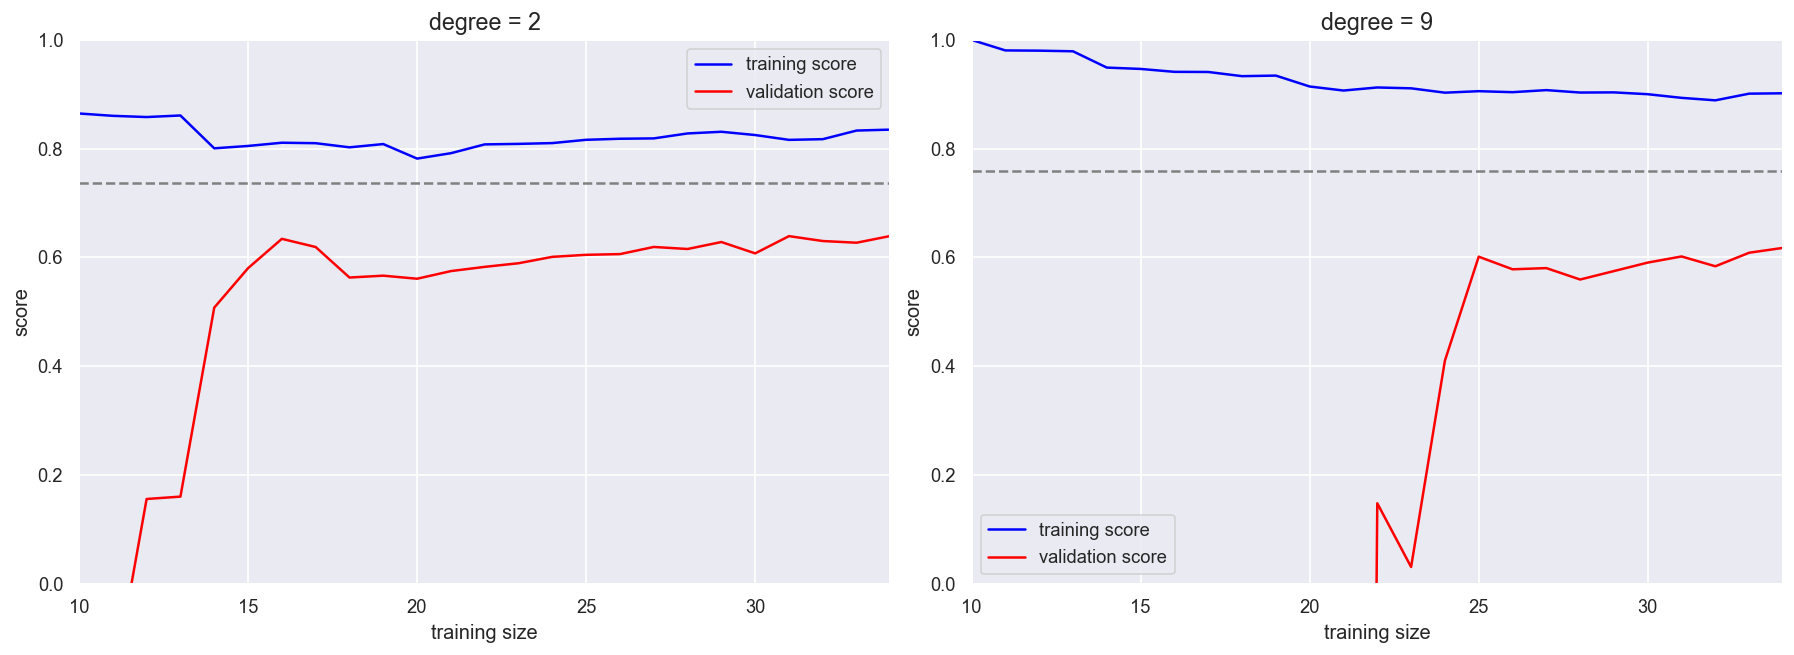

In [246]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

- Learning curves for a low-complexity model (left) and a high-complexity
model (right)

This is a valuable diagnostic, because it gives us a visual depiction of how our model
responds to increasing training data. In particular, when your learning curve has
already converged (i.e., when the training and validation curves are already close to
each other), adding more training data will not significantly improve the fit! This situation
is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated)
model. We see this in the right panel: by moving to a much more complicated
model, we increase the score of convergence (indicated by the dashed line), but
at the expense of higher model variance (indicated by the difference between the
training and validation scores). If we were to add even more data points, the learning
curve for the more complicated model would eventually converge.

Plotting a learning curve for your particular choice of model and dataset can help you
to make this type of decision about how to move forward in improving your analysis.

### Validation in Practice: Grid Search

Here is an example of using grid search to find the optimal polynomial model. We will
explore a three-dimensional grid of model features—namely, the polynomial degree,
the flag telling us whether to fit the intercept, and the flag telling us whether to normalize
the problem. We can set this up using Scikit-Learn’s GridSearchCV metaestimator:

In [272]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21), 
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

- Notice that like a normal estimator, this has not yet been applied to any data. Calling
the fit() method will fit the model at each grid point, keeping track of the scores
along the way:

In [273]:
grid.fit(X, y);

Now that this is fit, we can ask for the best parameters as follows:

In [275]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

- Finally, if we wish, we can use the best model and show the fit to our data using code
from before

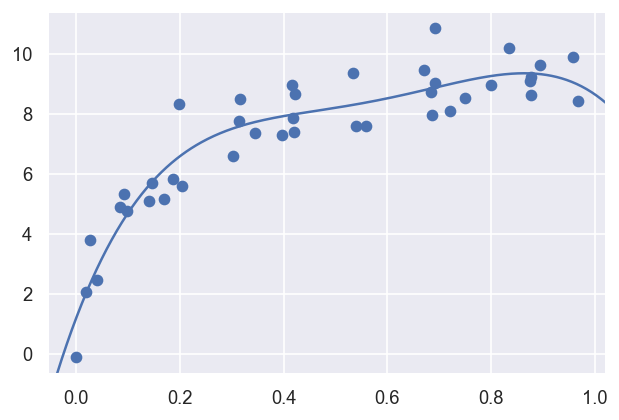

In [279]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

- The grid search provides many more options, including the ability to specify a custom
scoring function, to parallelize the computations, to do randomized searches,
and more.

## Feature Engineering

### Categorical Features

In [282]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

* one-hot encoding effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0,
respectively. When your data comes as a list of dictionaries, Scikit-Learn’s DictVector
izer will do this for you:

In [284]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

* Notice that the neighborhood column has been expanded into three separate columns,
representing the three neighborhood labels, and that each row has a 1 in the column
associated with its neighborhood. With these categorical features thus encoded, you
can proceed as normal with fitting a Scikit-Learn model.
- To see the meaning of each column, you can inspect the feature names:

In [286]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

There is one clear disadvantage of this approach: if your category has many possible
values, this can greatly increase the size of your dataset. However, because the encoded
data contains mostly zeros, a sparse output can be a very efficient solution:

In [288]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Text Features

In [293]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [294]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

- The result is a sparse matrix recording the number of times each word appears; it is
easier to inspect if we convert this to a DataFrame with labeled columns:

In [302]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


* There are some issues with this approach, however: the raw word counts lead to features
that put too much weight on words that appear very frequently, and this can be
suboptimal in some classification algorithms. One approach to fix this is known as
term frequency–inverse document frequency (TF–IDF), which weights the word counts
by a measure of how often they appear in the documents. The syntax for computing
these features is similar to the previous example:

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derived Features

we could convert a linear regression into a polynomial regression not by changing the
model, but by transforming the input! This is sometimes known as basis function
regression.

For example, this data clearly cannot be well described by a straight line:

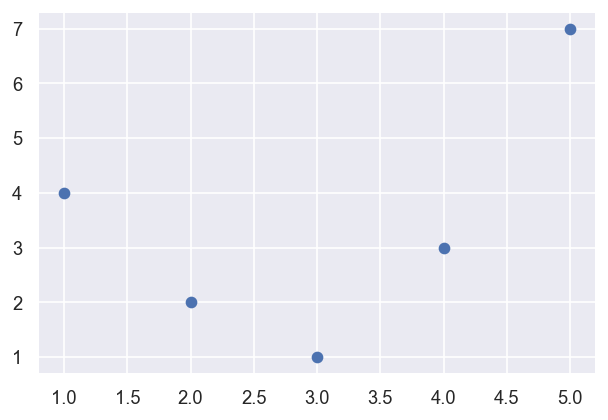

In [327]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

- Still, we can fit a line to the data using LinearRegression and get the optimal result

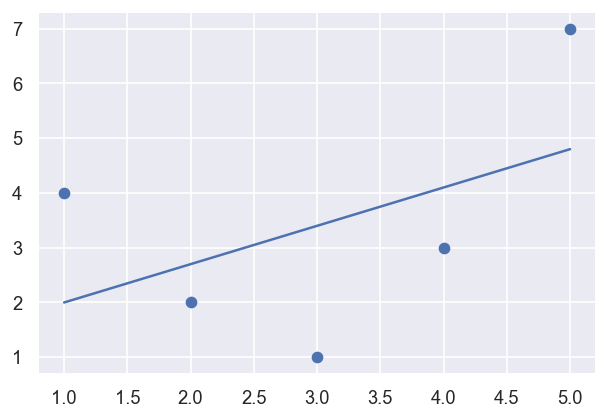

In [328]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

It’s clear that we need a more sophisticated model to describe the relationship
between x and y. We can do this by transforming the data, adding extra columns of
features to drive more flexibility in the model. For example, we can add polynomial
features to the data this way:

In [337]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


* The derived feature matrix has one column representing x, and a second column representing
x2, and a third column representing x3. Computing a linear regression on
this expanded input gives a much closer fit to our data

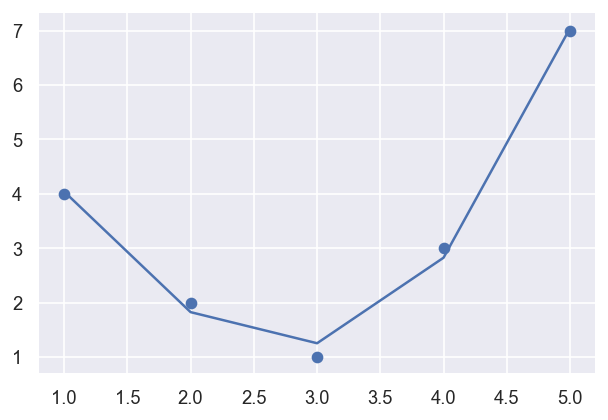

In [338]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

- This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods. More generally, this is one motivational path to the powerful set of techniques known as kernel methods.

### Imputation of Missing Data

In [358]:
X = np.array([[ np.nan, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, np.nan, 6 ],
              [ 8, 8, 1 ]])

y = np.array([14, 16, -1, 8, -5])

When applying a typical machine learning model to such data, we will need to first
replace such missing data with some appropriate fill value. This is known as imputation
of missing values, and strategies range from simple (e.g., replacing missing values
with the mean of the column) to sophisticated (e.g., using matrix completion or a
robust model to handle such data).

The sophisticated approaches tend to be very application-specific, and we won’t dive
into them here. For a baseline imputation approach, using the mean, median, or most
frequent value, Scikit-Learn provides the Imputer class:

In [359]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

- We see that in the resulting data, the two missing values have been replaced with the
mean of the remaining values in the column. This imputed data can then be fed
directly into, for example, a LinearRegression estimator:

In [360]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature Pipelines

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

To streamline this type of processing pipeline, Scikit-Learn provides a pipeline object,
which can be used as follows:

In [361]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the
specified steps to any input data.

In [362]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


All the steps of the model are applied automatically. Notice that for the simplicity of
this demonstration, we’ve applied the model to the data it was trained on; this is why
it was able to perfectly predict the result.

Source: Python Data Science Handbook - Jake VanderPlas